## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp_3layers(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_mlp_5layers(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_mlp_7layers(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32, 16, 8], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.5, 0.7, 0.9]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dropout_ratio in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout = %.2f" % (dropout_ratio))
    model = build_mlp_3layers(input_shape=x_train.shape[1:], drp_ratio=dropout_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-3layers-%s" % str(dropout_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp_5layers(input_shape=x_train.shape[1:], drp_ratio=dropout_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-5layers-%s" % str(dropout_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp_7layers(input_shape=x_train.shape[1:], drp_ratio=dropout_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-7layers-%s" % str(dropout_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Dropout = 0.25
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)     

50000/50000 [==============================] - 5s 108us/step - loss: 1.2986 - acc: 0.5360 - val_loss: 1.3092 - val_acc: 0.5334
Epoch 50/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.2895 - acc: 0.5399 - val_loss: 1.2954 - val_acc: 0.5366
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
________

Epoch 44/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.5509 - acc: 0.4446 - val_loss: 1.4655 - val_acc: 0.4702
Epoch 45/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.5411 - acc: 0.4413 - val_loss: 1.4655 - val_acc: 0.4730
Epoch 46/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.5311 - acc: 0.4475 - val_loss: 1.4486 - val_acc: 0.4835
Epoch 47/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.5218 - acc: 0.4505 - val_loss: 1.4503 - val_acc: 0.4826
Epoch 48/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.5206 - acc: 0.4525 - val_loss: 1.4409 - val_acc: 0.4827
Epoch 49/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.5178 - acc: 0.4556 - val_loss: 1.4433 - val_acc: 0.4748
Epoch 50/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.5080 - acc: 0.4577 - val_loss: 1.4287 - val_acc: 0.4904
___________________________

50000/50000 [==============================] - 6s 124us/step - loss: 1.9688 - acc: 0.2085 - val_loss: 1.9215 - val_acc: 0.2266
Epoch 36/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.9668 - acc: 0.2128 - val_loss: 1.9194 - val_acc: 0.2281
Epoch 37/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.9631 - acc: 0.2101 - val_loss: 1.9374 - val_acc: 0.2219
Epoch 38/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.9576 - acc: 0.2121 - val_loss: 1.9159 - val_acc: 0.2268
Epoch 39/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.9551 - acc: 0.2156 - val_loss: 1.9155 - val_acc: 0.2401
Epoch 40/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.9513 - acc: 0.2158 - val_loss: 1.9256 - val_acc: 0.2330
Epoch 41/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.9478 - acc: 0.2137 - val_loss: 1.9219 - val_acc: 0.2316
Epoch 42/50
50000/50000 [==============

50000/50000 [==============================] - 5s 106us/step - loss: 1.6661 - acc: 0.4010 - val_loss: 1.5379 - val_acc: 0.4572
Epoch 34/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.6652 - acc: 0.4040 - val_loss: 1.5441 - val_acc: 0.4555
Epoch 35/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.6614 - acc: 0.4051 - val_loss: 1.5238 - val_acc: 0.4616
Epoch 36/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.6539 - acc: 0.4059 - val_loss: 1.5220 - val_acc: 0.4614
Epoch 37/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.6580 - acc: 0.4061 - val_loss: 1.5260 - val_acc: 0.4595
Epoch 38/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.6408 - acc: 0.4123 - val_loss: 1.5340 - val_acc: 0.4598
Epoch 39/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.6343 - acc: 0.4113 - val_loss: 1.5142 - val_acc: 0.4659
Epoch 40/50
50000/50000 [==============

Epoch 28/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.0385 - acc: 0.2059 - val_loss: 2.0091 - val_acc: 0.2226
Epoch 29/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.0355 - acc: 0.2076 - val_loss: 2.0010 - val_acc: 0.2265
Epoch 30/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.0323 - acc: 0.2076 - val_loss: 1.9891 - val_acc: 0.2241
Epoch 31/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.0285 - acc: 0.2100 - val_loss: 1.9839 - val_acc: 0.2309
Epoch 32/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.0235 - acc: 0.2110 - val_loss: 2.0089 - val_acc: 0.2237
Epoch 33/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.0185 - acc: 0.2145 - val_loss: 1.9847 - val_acc: 0.2299
Epoch 34/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.0210 - acc: 0.2142 - val_loss: 1.9646 - val_acc: 0.2351
Epoch 35/50
50000/50000 [==

50000/50000 [==============================] - 6s 118us/step - loss: 2.2528 - acc: 0.1404 - val_loss: 2.2387 - val_acc: 0.1720
Epoch 20/50
50000/50000 [==============================] - 6s 114us/step - loss: 2.2458 - acc: 0.1427 - val_loss: 2.2445 - val_acc: 0.1566
Epoch 21/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.2386 - acc: 0.1428 - val_loss: 2.2319 - val_acc: 0.1600
Epoch 22/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.2306 - acc: 0.1437 - val_loss: 2.2327 - val_acc: 0.1517
Epoch 23/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.2266 - acc: 0.1446 - val_loss: 2.2055 - val_acc: 0.1686
Epoch 24/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.2212 - acc: 0.1458 - val_loss: 2.1941 - val_acc: 0.1665
Epoch 25/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.2163 - acc: 0.1461 - val_loss: 2.2156 - val_acc: 0.1465
Epoch 26/50
50000/50000 [==============

W0830 15:46:18.162217  7392 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0830 15:46:18.188220  7392 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0830 15:46:18.212222  7392 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Experiment with Dropout = 0.70
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)     

50000/50000 [==============================] - 6s 111us/step - loss: 1.9875 - acc: 0.2314 - val_loss: 2.0230 - val_acc: 0.2268
Epoch 50/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.9789 - acc: 0.2341 - val_loss: 2.0291 - val_acc: 0.2275


W0830 15:51:09.590357  7392 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0830 15:51:09.615360  7392 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

Epoch 46/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.2721 - acc: 0.1354 - val_loss: 2.2953 - val_acc: 0.1067
Epoch 47/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.2725 - acc: 0.1354 - val_loss: 2.2942 - val_acc: 0.1106
Epoch 48/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.2714 - acc: 0.1365 - val_loss: 2.2937 - val_acc: 0.1106
Epoch 49/50
50000/50000 [==============================] - 6s 130us/step - loss: 2.2704 - acc: 0.1365 - val_loss: 2.2905 - val_acc: 0.1163
Epoch 50/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.2653 - acc: 0.1428 - val_loss: 2.2922 - val_acc: 0.1081
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512) 

50000/50000 [==============================] - 6s 126us/step - loss: 2.3026 - acc: 0.0984 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 38/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.3026 - acc: 0.0983 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 39/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.3027 - acc: 0.0969 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 40/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.3027 - acc: 0.0966 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 41/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.3026 - acc: 0.0984 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.3026 - acc: 0.0984 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.3026 - acc: 0.0968 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============

50000/50000 [==============================] - 5s 108us/step - loss: 2.3026 - acc: 0.0983 - val_loss: 2.3026 - val_acc: 0.1002
Epoch 36/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.3027 - acc: 0.0998 - val_loss: 2.3026 - val_acc: 0.1002
Epoch 37/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.3026 - acc: 0.0985 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 38/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.3027 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1002
Epoch 39/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.3026 - acc: 0.0973 - val_loss: 2.3026 - val_acc: 0.1003
Epoch 40/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.3027 - acc: 0.0979 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 41/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.3026 - acc: 0.0988 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============

50000/50000 [==============================] - 6s 110us/step - loss: 7.6594 - acc: 0.0988 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 6s 110us/step - loss: 7.6904 - acc: 0.0991 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 6s 111us/step - loss: 7.5392 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 6s 111us/step - loss: 7.5774 - acc: 0.1003 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 6s 110us/step - loss: 7.5298 - acc: 0.1006 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 6s 110us/step - loss: 7.4923 - acc: 0.1004 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 6s 110us/step - loss: 7.4748 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 36/50
50000/50000 [=======

Epoch 20/50
50000/50000 [==============================] - 6s 121us/step - loss: 3.2246 - acc: 0.0984 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/50
50000/50000 [==============================] - 6s 115us/step - loss: 3.1995 - acc: 0.0990 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/50
50000/50000 [==============================] - 6s 114us/step - loss: 3.2292 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 6s 118us/step - loss: 3.2360 - acc: 0.0969 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 24/50
50000/50000 [==============================] - 6s 112us/step - loss: 3.2145 - acc: 0.0990 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 25/50
50000/50000 [==============================] - 6s 111us/step - loss: 3.2189 - acc: 0.1005 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 26/50
50000/50000 [==============================] - 6s 114us/step - loss: 3.1980 - acc: 0.0980 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 27/50
50000/50

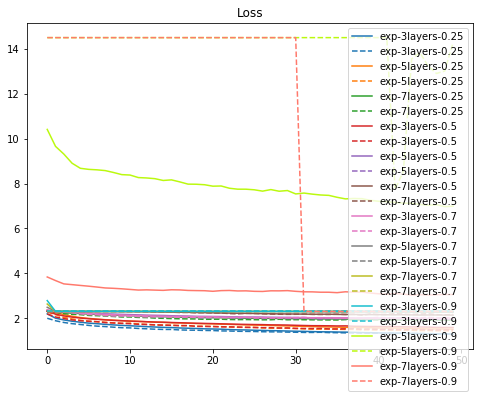

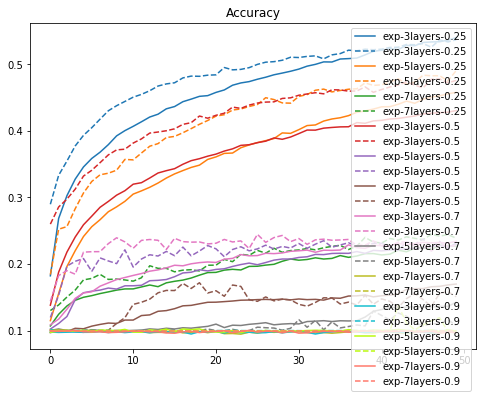

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "xkcd:yellowgreen", "xkcd:salmon"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()